In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
machine_data = pd.io.json.read_json('data_log_machine.json')

In [47]:
final_machine_data = []
with open('final_data_machine.json') as f_:
    final_machine_data = json.load(f_)

In [84]:
final_human_data = []
with open('final_data_human.json') as f:
    final_human_data = json.load(f)

In [48]:
# load dataframe
machine_df = pd.json_normalize(final_machine_data)
machine_df = machine_df.drop(columns=['game_done', 'game_info.total_reward', 'game_info.turn_energy_used', 
                                  'game_info.turn_reward', 'raw_action', "action"])
machine_df.head(5)

,game_id,turn,reward,percent_saved,game_info.total_energy_used,game_info.total_energy_remaining,object_data.squished,object_data.delivered,object_data.burned,object_data.peds_picked_up,object_data.batteries,object_data.steps_in_fire
0,0f562faa-5524-4568-a71a-8610ed6bf354,218,179,67.74,-9,59,0,21,10,21,12,4
1,982013c7-f005-47cc-9a4f-ca15690f36e1,237,207,58.14,-22,72,0,25,18,25,13,0
2,e5764608-bc6a-4f45-a730-a949ea296fe5,213,171,68.97,-20,70,0,20,9,20,12,2
3,d076a88e-307e-44c5-833f-d341ff254093,200,173,74.07,10,40,0,20,7,20,10,3
4,96ce62f0-60fa-496b-b8d1-70955e857caa,223,160,63.33,-7,57,0,19,11,19,12,3


In [85]:
human_df = pd.json_normalize(final_human_data)
human_df = human_df.drop(columns=['game_done', 'game_info.total_reward', 'game_info.turn_energy_used',
                                  'game_info.turn_reward','raw_action', 'action'])

In [62]:
# get general stats
machine_df.describe()

,turn,reward,percent_saved,game_info.total_energy_used,game_info.total_energy_remaining,object_data.squished,object_data.delivered,object_data.burned,object_data.peds_picked_up,object_data.batteries,object_data.steps_in_fire
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,228.035294,161.423529,60.951647,-9.900000,59.900000,0.005882,19.335294,12.588235,19.417647,15.376471,22.864706
std,49.441842,35.923119,10.731025,35.915853,35.915853,0.076696,3.850681,4.755051,3.856407,5.235239,27.311039
min,123.000000,97.000000,39.020000,-106.000000,-3.000000,0.000000,13.000000,0.000000,13.000000,8.000000,0.000000
25%,197.500000,141.000000,53.037500,-32.000000,40.250000,0.000000,17.000000,10.000000,17.000000,11.000000,2.000000
50%,214.000000,159.000000,60.265000,-13.000000,63.000000,0.000000,19.000000,13.000000,19.000000,13.500000,9.500000
75%,250.750000,175.000000,66.670000,9.750000,82.000000,0.000000,21.000000,15.000000,21.000000,18.000000,41.250000
max,541.000000,414.000000,100.000000,53.000000,156.000000,1.000000,46.000000,25.000000,46.000000,30.000000,101.000000


In [86]:
human_df.describe()

,turn,reward,percent_saved,game_info.total_energy_used,game_info.total_energy_remaining,object_data.squished,object_data.delivered,object_data.burned,object_data.peds_picked_up,object_data.batteries,object_data.steps_in_fire
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,226.692308,136.230769,52.878462,41.076923,8.923077,0.846154,16.538462,11.769231,17.769231,11.153846,12.153846
std,55.815745,57.470505,23.072671,20.770418,20.770418,0.987096,6.132093,8.084490,5.875852,4.450583,13.378130
min,109.000000,69.000000,21.050000,-7.000000,-3.000000,0.000000,8.000000,2.000000,8.000000,3.000000,0.000000
25%,221.000000,95.000000,36.000000,50.000000,-2.000000,0.000000,12.000000,5.000000,13.000000,10.000000,2.000000
50%,246.000000,113.000000,48.650000,51.000000,-1.000000,1.000000,15.000000,8.000000,18.000000,13.000000,7.000000
75%,251.000000,185.000000,74.190000,52.000000,0.000000,1.000000,22.000000,19.000000,23.000000,13.000000,20.000000
max,294.000000,232.000000,92.860000,53.000000,57.000000,3.000000,26.000000,27.000000,26.000000,18.000000,42.000000


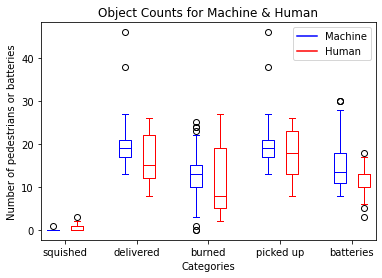

In [114]:
# get box plots for objects

machine_to_plot = machine_df.drop(columns=['game_id'])
human_to_plot = human_df.drop(columns=['game_id'])
# print(machine_to_plot.dtypes)
# machine_to_plot.columns
for idx, column in enumerate(['object_data.squished', 'object_data.delivered', 'object_data.burned', 
                              'object_data.peds_picked_up', 'object_data.batteries']):
    
    bp = plt.boxplot([machine_to_plot[column], human_to_plot[column]], positions=[3*idx+1, 3*idx+2], widths=0.5)
    
    # blue is machine, red is human
    plt.setp(bp['boxes'][0], color='blue')
    plt.setp(bp['caps'][0:2], color='blue')
    plt.setp(bp['whiskers'][0:2], color='blue')
    plt.setp(bp['fliers'][0:2], color='blue')
    plt.setp(bp['medians'][0], color='blue')

    plt.setp(bp['boxes'][1], color='red')
    plt.setp(bp['caps'][2:4], color='red')
    plt.setp(bp['whiskers'][2:4], color='red')
    plt.setp(bp['fliers'][0:2], color='red')
    plt.setp(bp['medians'][1], color='red')
    
plt.xticks(np.arange(1, 15, step=3) + 0.5, ['squished', 'delivered', 'burned', 'picked up', 'batteries'])
plt.title('Object Counts for Machine & Human')
plt.ylabel('Number of pedestrians or batteries')
plt.xlabel('Categories')

plt.plot([], c='blue', label='Machine')
plt.plot([], c='red', label='Human')
plt.legend()

plt.show()